In [24]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes 
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
# Importando a base de dados para o pandas
dataset = "data/spam.csv"
sms = pd.read_csv(f'{dataset}', encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [27]:
# mais casos negativos (ham) que positivos (spams) 
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [28]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [29]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [30]:
# número de características ou tokens
# trained_features = couvec.get_feature_names()
# print("Número de características vetorizadas:", len(trained_features))
# print("Exemplos de características treinadas:", trained_features[1:10])

In [31]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7694)
  (0, 7480)	1
  (0, 4628)	1
  (0, 6114)	1
  (0, 4172)	1
  (0, 7346)	1
  (0, 3852)	1
  (0, 7328)	1
  (0, 3732)	1
  (0, 3803)	1
  (1, 259)	1
  (1, 2886)	1
  (1, 4797)	1
  (1, 7024)	1
  (1, 3118)	2
  (1, 4921)	1
  (1, 1391)	1
  (1, 7133)	1
  (1, 4645)	1
  (1, 857)	1
  (1, 2540)	1
  (1, 7674)	1
  (1, 315)	1
  (1, 6860)	2
  (1, 630)	1
  (1, 3808)	1
  (1, 960)	1
  (1, 3096)	1
  (1, 1743)	1


In [32]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7694)


In [33]:
# Construíndo e avaliando o modelo

# Multimodal Naive Bayes
# O classificador multimodal Naive Bayes é útil para classificar características discretas.
# (e.g., número de palavras para classificação de textos).
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [34]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [35]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [36]:
# Acurácia
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.9775784753363229

In [37]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, labels_pred)

array([[959,   6],
       [ 19, 131]])

In [38]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.8733333333333333
Precisão: 0.9562043795620438


In [39]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [9.99822711e-01 1.77288828e-04]


In [40]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

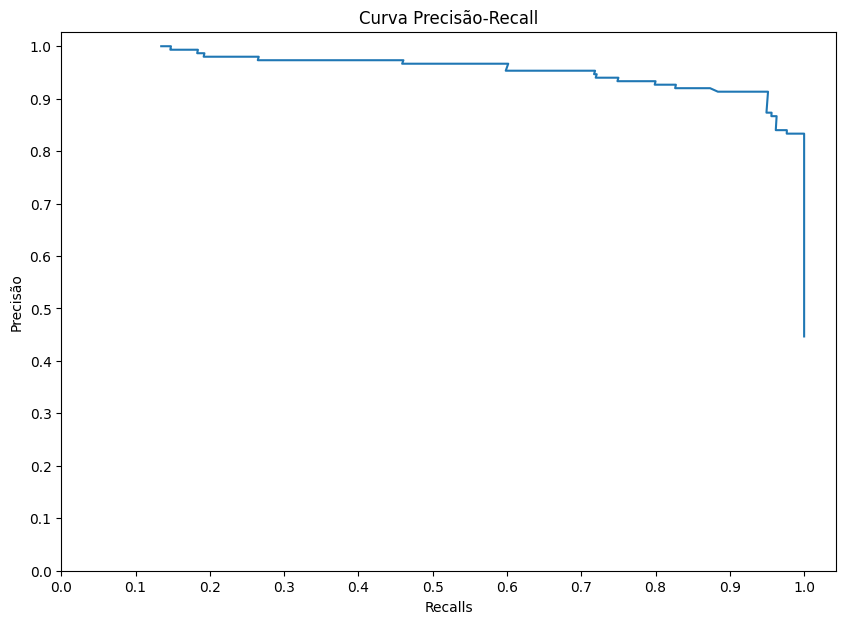

In [41]:
# Plotando a curva precisão-recall 

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()

Uma alternativa é utilizar ComplementNB, que é um classificador Naive Bayes projetado para conjuntos de dados desequilibrados. Esse classificador ajusta os pesos de probabilidade para cada classe, a fim de corrigir a distribuição desigual de classes. CNB regularmente performa melhor que MNB na tarefa de classificação de texto.


Complement Naive Bayes:
Accuracy: 0.9721973094170404
Confusion matrix:
 [[947  18]
 [ 13 137]]
Recall: 0.9133333333333333
Precision: 0.8838709677419355
Order of classes in predict_proba: [0 1]
Examples of class probabilities: [0.99885482 0.00114518]


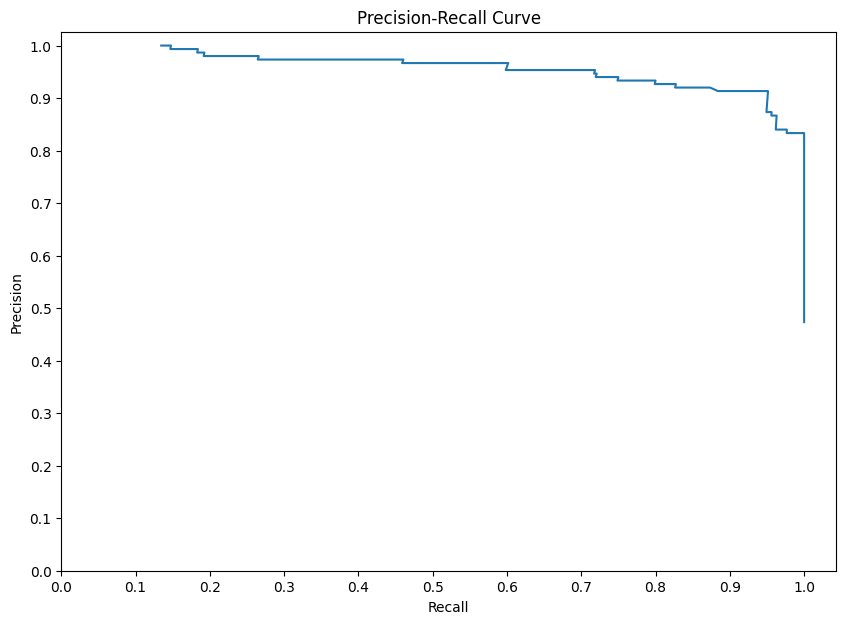

In [54]:

from sklearn.naive_bayes import ComplementNB
nb = ComplementNB()

# Training the model
nb.fit(dtm_train.toarray(), labels_train)

# Making predictions
labels_pred = nb.predict(dtm_test.toarray())

print("Complement Naive Bayes:", end="\n========================\n")

# Accuracy
metrics.accuracy_score(labels_test, labels_pred)
print("Accuracy:", metrics.accuracy_score(labels_test, labels_pred))

# Confusion matrix for precision and recall
metrics.confusion_matrix(labels_test, labels_pred)
print("Confusion matrix:\n", metrics.confusion_matrix(labels_test, labels_pred))

# Recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Precision
print("Precision:", metrics.precision_score(labels_test, labels_pred))

# Probabilities of classes
print("Order of classes in predict_proba:", nb.classes_)
print("Examples of class probabilities:", nb.predict_proba(dtm_test.toarray())[0])

# Precision-recall curve
labels_prob = nb.predict_proba(dtm_test.toarray())[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

# Plotting the precision-recall curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recall")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Precision-Recall Curve")
plt.show()


Nesse conjunto de dados os dois modelos são parecidos em acurácia, contudo, CNB é levemente mais rápido e apresenta um melhor recall. Por outro lado, MNB tem uma precisão mais alta.

Pensando na precisão, abaixo foi feito um teste com a Regressão logística, que apresentou um resultado melhor que os demais nessa métrica.

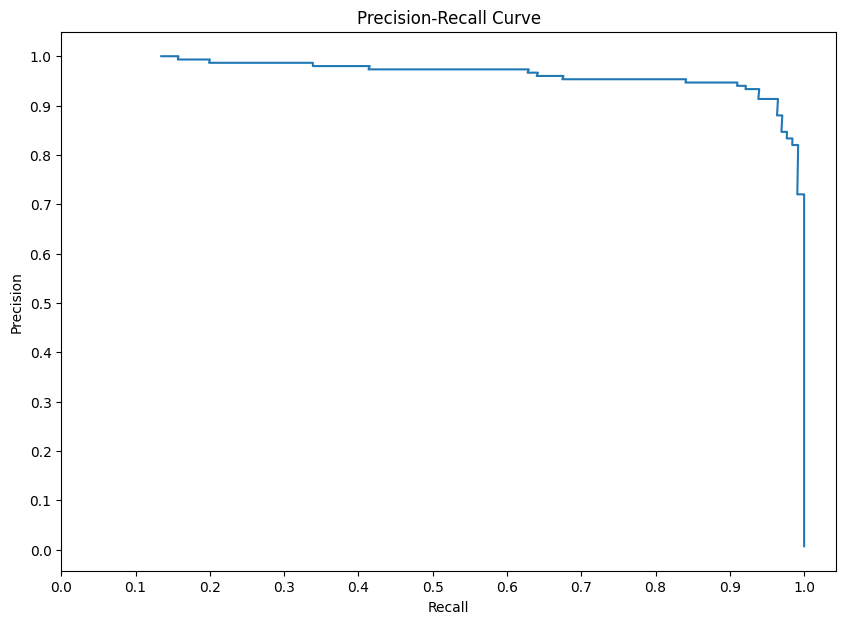

In [49]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Train the model
logreg.fit(dtm_train, labels_train)

# Make predictions
labels_pred = logreg.predict(dtm_test)

# Accuracy
accuracy = metrics.accuracy_score(labels_test, labels_pred)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(labels_test, labels_pred)

# Recall
recall = metrics.recall_score(labels_test, labels_pred)

# Precision
precision = metrics.precision_score(labels_test, labels_pred)

# Probabilities of classes
class_probabilities = logreg.predict_proba(dtm_test)

# Precision-recall curve
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, class_probabilities[:, 1])

# Plotting the precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recall")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Precision-Recall Curve")
plt.show()


In [53]:
print("Logistic Regression", end="\n=====================\n")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)
print("Recall:", recall)
print("Precision:", precision)
print("Order of classes in predict_proba:", logreg.classes_)
print("Examples of class probabilities:", class_probabilities[0])

Logistic Regression
Accuracy: 0.9766816143497757
Confusion Matrix:
[[962   3]
 [ 23 127]]
Recall: 0.8466666666666667
Precision: 0.9769230769230769
Order of classes in predict_proba: [0 1]
Examples of class probabilities: [0.99212105 0.00787895]
